In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../Dataset/Train'
valid_path = '../Dataset/Test'

In [3]:
# Image data generator with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
batch_size=32
# Generate train and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


Data Visualization

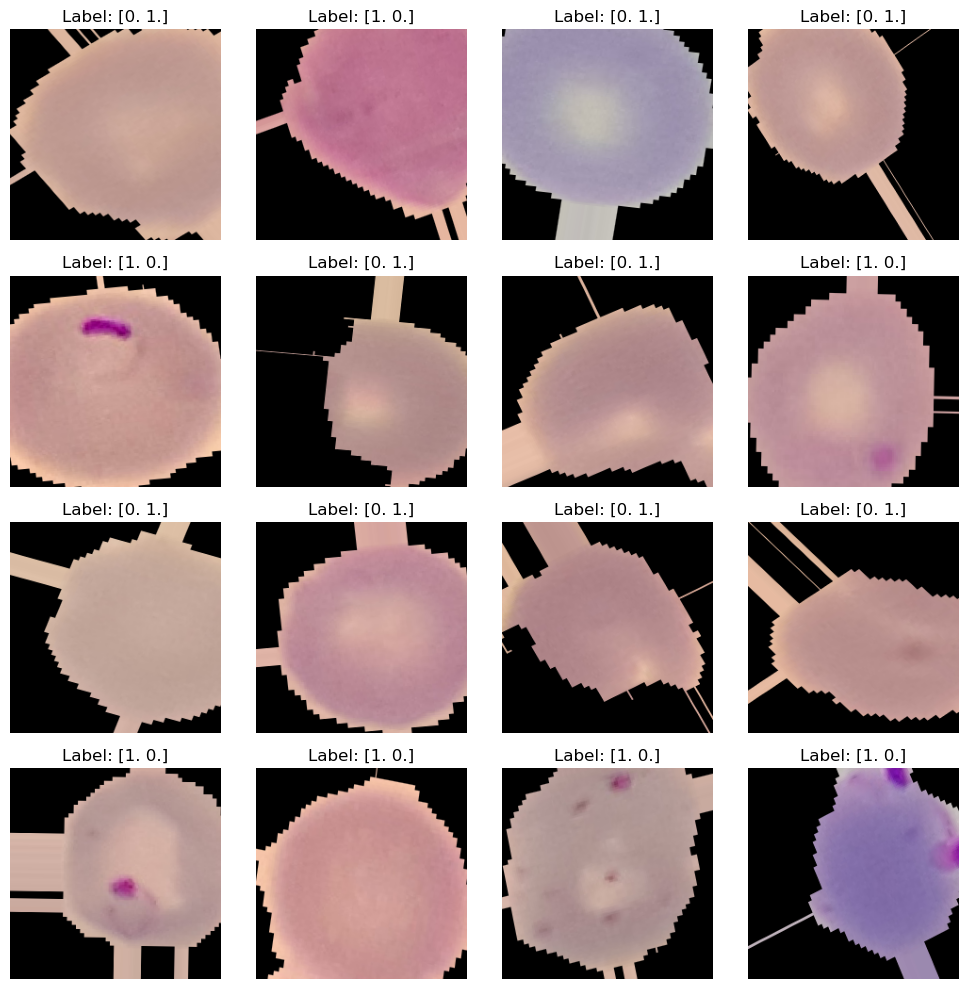

In [5]:
import matplotlib.pyplot as plt

# Assuming train_generator is already defined

# Display the first batch of images
images, labels = next(train_generator)

# Create a grid of subplots
plt.figure(figsize=(10, 10))
for i in range(16):  # Display 16 images
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:

### Create Model from scratch using CNN
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
13/13 [==============================] - 44s 3s/step - loss: 1.5166 - accuracy: 0.5312 - val_loss: 0.7869 - val_accuracy: 0.3203
Epoch 2/20
13/13 [==============================] - 30s 2s/step - loss: 0.7074 - accuracy: 0.5433 - val_loss: 0.6927 - val_accuracy: 0.5469
Epoch 3/20
13/13 [==============================] - 29s 2s/step - loss: 0.6841 - accuracy: 0.5505 - val_loss: 0.6660 - val_accuracy: 0.6875
Epoch 4/20
13/13 [==============================] - 29s 2s/step - loss: 0.6744 - accuracy: 0.5793 - val_loss: 0.6898 - val_accuracy: 0.6406
Epoch 5/20
13/13 [==============================] - 30s 2s/step - loss: 0.6416 - accuracy: 0.6514 - val_loss: 0.6969 - val_accuracy: 0.6641
Epoch 6/20
13/13 [==============================] - 28s 2s/step - loss: 0.5813 - accuracy: 0.6346 - val_loss: 0.6812 - val_accuracy: 0.5234
Epoch 7/20
13/13 [==============================] - 31s 2s/step - loss: 0.5387 - accuracy: 0.7957 - val_loss: 0.7211 - val_accuracy: 0.4688
Epoch 8/20
13/13 [==

In [10]:
model.save('malaria-detection-model1.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


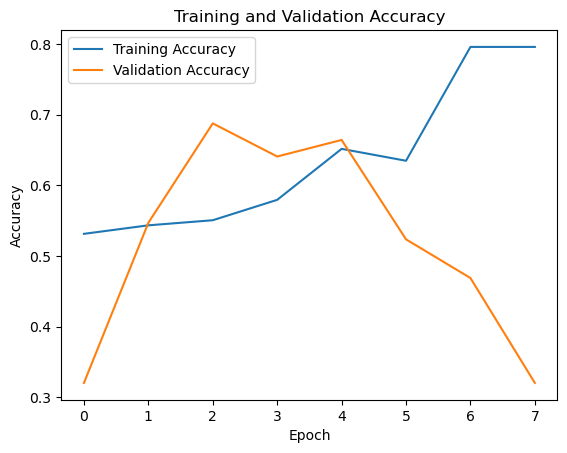

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

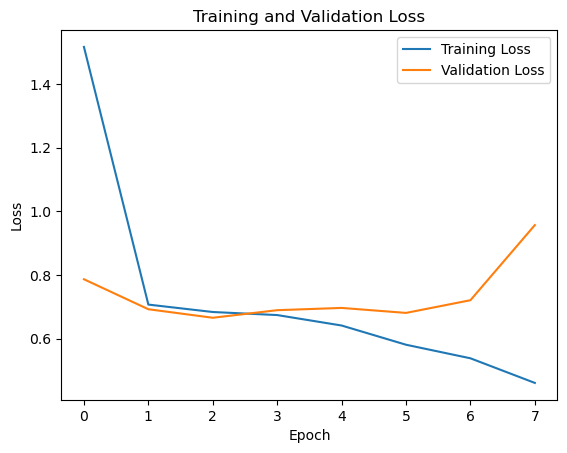

In [12]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Predictions
y_pred = model.predict(valid_generator)


5/5 [==============================] - 2s 330ms/step


In [14]:
y_pred

array([[9.61070180e-01, 3.89297642e-02],
       [3.54903340e-02, 9.64509726e-01],
       [1.71139017e-01, 8.28860998e-01],
       [9.00037825e-01, 9.99622419e-02],
       [1.42269894e-01, 8.57730091e-01],
       [4.32155550e-01, 5.67844450e-01],
       [1.92800403e-01, 8.07199597e-01],
       [1.11421019e-01, 8.88579011e-01],
       [2.61266589e-01, 7.38733470e-01],
       [3.81190240e-01, 6.18809700e-01],
       [5.74190497e-01, 4.25809503e-01],
       [8.81795362e-02, 9.11820471e-01],
       [2.07358494e-01, 7.92641461e-01],
       [7.20605180e-02, 9.27939475e-01],
       [6.18998632e-02, 9.38100159e-01],
       [1.04136214e-01, 8.95863831e-01],
       [9.34125721e-01, 6.58742860e-02],
       [4.48291093e-01, 5.51708996e-01],
       [8.32160592e-01, 1.67839393e-01],
       [1.18737854e-01, 8.81262124e-01],
       [5.77908695e-01, 4.22091365e-01],
       [3.18721414e-01, 6.81278586e-01],
       [9.99547780e-01, 4.52201377e-04],
       [3.16008717e-01, 6.83991373e-01],
       [3.878500

In [15]:
y_pred = np.argmax(y_pred, axis=1)

In [16]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [17]:
# Get true labels from the validation generator
y_true = valid_generator.classes

In [18]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

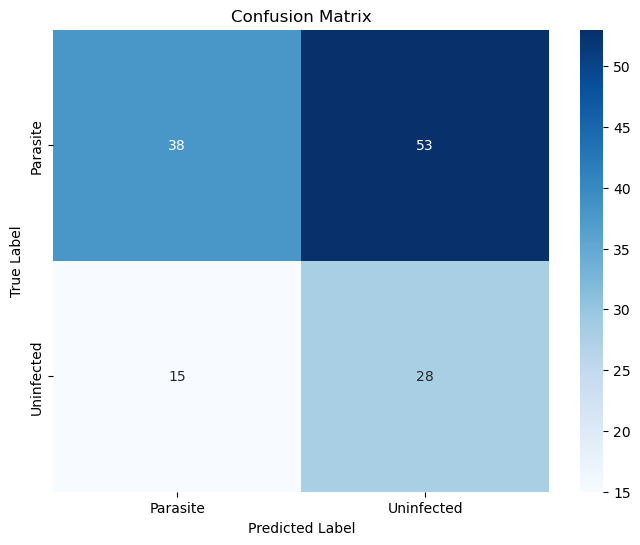

In [19]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()